In [1]:
import numpy as np
import netCDF4 as nc
import glob
import os
from scipy.interpolate import PchipInterpolator

import matplotlib as mpl
font = {'family' : 'sans',
        'size'   : 12}

mpl.rc('font', **font)
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MultipleLocator, LogLocator, MaxNLocator
import matplotlib.pyplot as plt

import pandas as pd
from cmcrameri import cm

In [2]:
from proteus.config import read_config
import utils.load_grid as lg

In [3]:
%matplotlib inline
# %config InlineBackend.figure_format='retina'

# %matplotlib widget

In [4]:
pgrid_dir = "data/output/l98d_escape7/"
cases = lg.get_cases(pgrid_dir)
ncases = len(cases)

In [5]:
cnums = ["%d"%int(s.split("_")[-1]) for s in cases]
stts = lg.get_statuses(pgrid_dir)
helps, hvars = lg.load_helpfiles(cases)

confs = []
for f in cases:
    confs.append( read_config(f+"/init_coupler.toml") )

transit, eclipse = lg.load_synthobs(cases)

print("Done")

Synthobs: 100%|██████████| 21/21 [00:01<00:00, 11.73it/s]

Done


In [6]:
g24 = pd.read_csv("data/shared/gressier24.csv", delimiter=' ')
g24_x = g24["central_wavelength(microns)"]
g24_y = g24["transit_depth"] * 1e6
g24_e = g24["transit_depth_error"] * 1e6

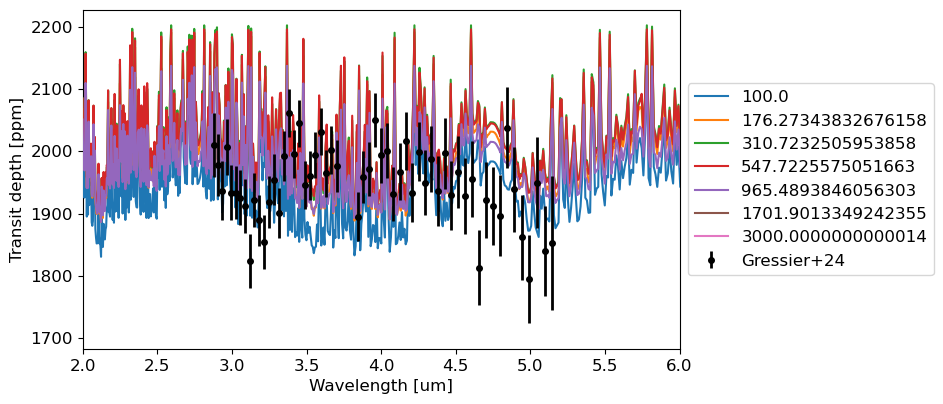

In [11]:
figscale = 1.1
fig,ax = plt.subplots(1,1, figsize=(7*figscale,4*figscale))

zkey = "delivery.elements.H_ppmw"
zctrl = {"struct.mass_tot": 1.94}
yvar = transit
ylbl = "Transit depth [ppm]"
dsmp = 5

# plot sims
for i in range(ncases):
    cfg = confs[i]

    incl = True
    for k in zctrl.keys():
        if not np.isclose(lg.descend_get(cfg,k),zctrl[k]):
            incl = False
    if not incl:
        continue

    lbl = lg.descend_get(cfg, zkey)
    x = transit[i]["Wavelength/um"][::dsmp]
    y = transit[i]["None/ppm"][::dsmp]

    ax.plot(x,y, label=lbl, zorder=3)

# plot literature
ax.errorbar(g24_x, g24_y, yerr=g24_e, zorder=4, label="Gressier+24",
                lw=0, color='black',
                fmt='o', elinewidth=2, markersize=4)

ax.set(xlabel="Wavelength [um]", xlim=(2, 6))
ax.set(ylabel=ylbl)

ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()